<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones del dataset: (20640, 10)

Valores faltantes por columna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Estadísticas numéricas:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Variable objetivo: median_house_value

Correlación con la variable objetivo:
median_income         0.688075
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
Name: median_house_value, dtype: float64


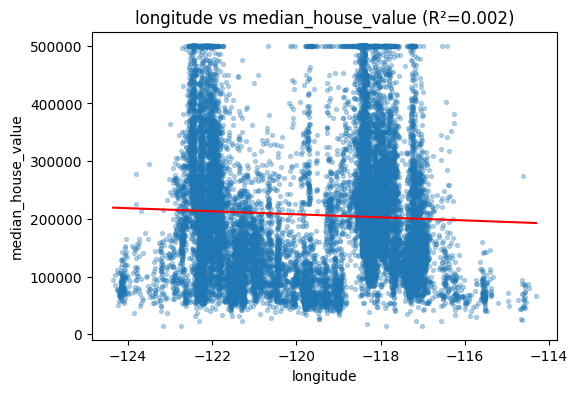

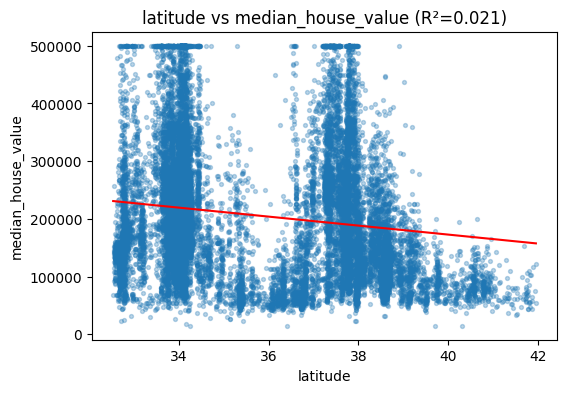

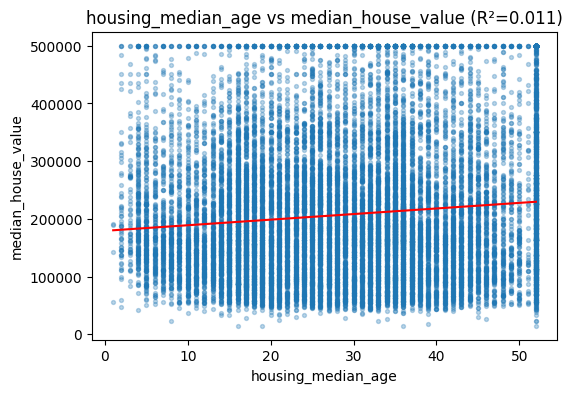

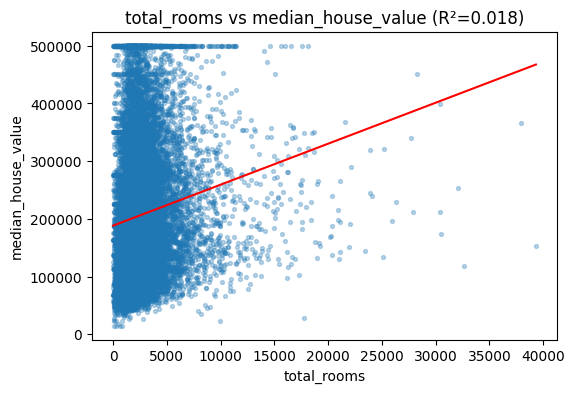

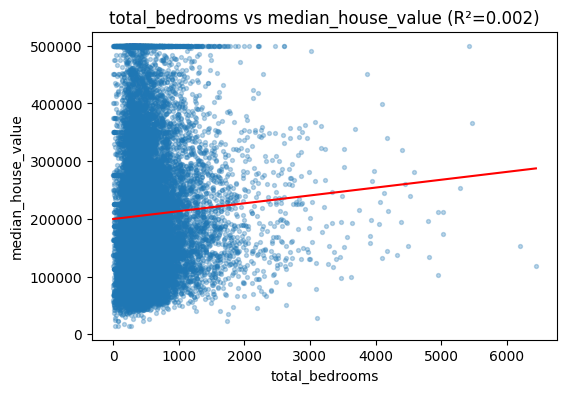

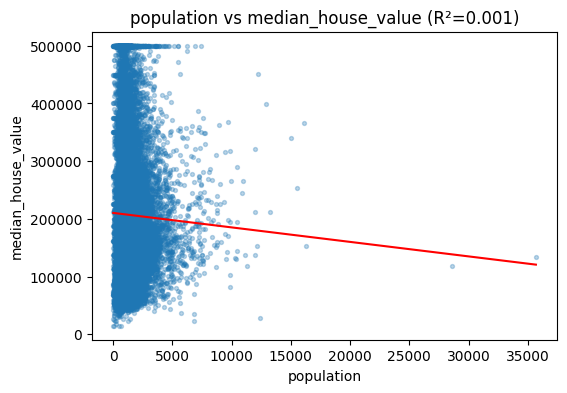

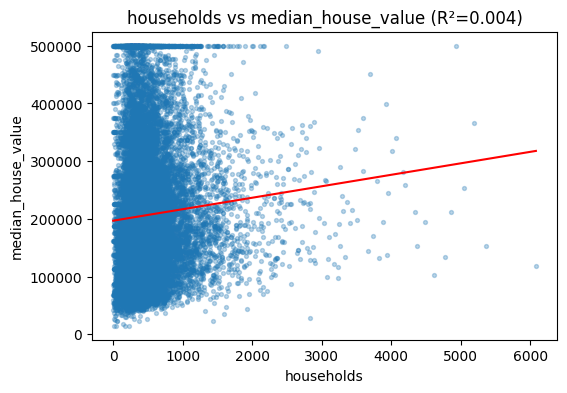

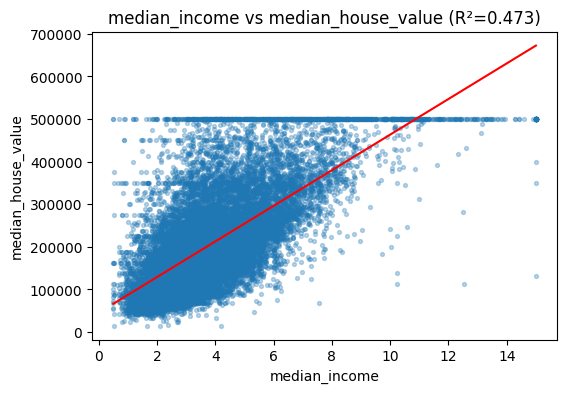


Resultados de regresiones lineales simples:


,feature,coef,intercept,R²,RMSE
7,median_income,41793.849202,45085.576703,0.473447,83733.574526
1,latitude,-7788.312115,484367.875003,0.020782,114187.467563
3,total_rooms,7.095972,188152.515342,0.017997,114349.740366
2,housing_median_age,968.449640,179119.916589,0.011156,114747.336285
6,households,19.872775,196928.577162,0.004335,115142.420092
4,total_bedrooms,13.611202,199543.348346,0.002469,115290.268798
0,longitude,-2647.497815,-109704.714439,0.002113,115270.847481
5,population,-2.511753,210436.262076,0.000608,115357.758354



Modelo multivariante: R²=0.636, RMSE=69658.19

Coeficientes del modelo multivariante:


,0
longitude,-42610.402574
latitude,-42475.478246
median_income,39752.223676
housing_median_age,1144.450848
total_bedrooms,81.160967
households,79.304722
population,-39.873200
total_rooms,-6.620917



Predicción para casa con 4 habitantes: 250,782.36 (median_house_value)

Casas con exactamente 4 dormitorios: 7
Precio promedio de casas con 4 dormitorios: 186,428.71

Casas con 4 dormitorios por hogar: 28
Precio promedio estimado de casas con 4 dormitorios por hogar: 171,614.25


In [13]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#cargar el data set
file_path = "/content/housing.csv"


df = pd.read_csv(file_path)

print("Dimensiones del dataset:", df.shape)
print("\nValores faltantes por columna:")
print(df.isnull().sum())

print("\nEstadísticas numéricas:")
display(df.describe())

#seleccion varible objetivo
possible_targets = ['median_house_value', 'price', 'median_price', 'house_value']
target = None
for t in possible_targets:
    if t in df.columns:
        target = t
        break
if target is None:
    raise ValueError("No encontré una columna de precio objetivo.")

print("\nVariable objetivo:", target)

#seleccion variables predictorias y corelaccion
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in numeric_cols if c != target]
corr = df[features + [target]].corr()[target].drop(target).sort_values(key=lambda x: abs(x), ascending=False)
print("\nCorrelación con la variable objetivo:")
print(corr)

#regresiones lineales
results = []
for feat in features:
    sub = df[[feat, target]].dropna()
    X = sub[[feat]].values.reshape(-1,1)
    y = sub[target].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append([feat, model.coef_[0], model.intercept_, r2, rmse])

    plt.figure(figsize=(6,4))
    plt.scatter(X, y, s=8, alpha=0.3)
    xs = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    plt.plot(xs, model.predict(xs), color="red")
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.title(f"{feat} vs {target} (R²={r2:.3f})")
    plt.show()

res_df = pd.DataFrame(results, columns=["feature","coef","intercept","R²","RMSE"])
print("\nResultados de regresiones lineales simples:")
display(res_df.sort_values(by="R²", ascending=False))

#modelo multivariable
X_all = df[features].fillna(df[features].median())
y_all = df[target].fillna(df[target].median())

lin = LinearRegression().fit(X_all, y_all)
y_pred = lin.predict(X_all)
r2_all = r2_score(y_all, y_pred)
rmse_all = np.sqrt(mean_squared_error(y_all, y_pred))

print(f"\nModelo multivariante: R²={r2_all:.3f}, RMSE={rmse_all:.2f}")

coef_df = pd.Series(lin.coef_, index=features).sort_values(key=lambda x: abs(x), ascending=False)
print("\nCoeficientes del modelo multivariante:")
display(coef_df)

#prediccion de la casa de 4 habitantes
example = X_all.median().to_dict()
if "population" in df.columns:
    example["population"] = 4
else:
    print(" No existe la columna 'population', usé las medianas de todo el dataset.")

example_df = pd.DataFrame([example])[features]
pred_price = lin.predict(example_df)[0]
print(f"\nPredicción para casa con 4 habitantes: {pred_price:,.2f} ({target})")

if "total_bedrooms" in df.columns:
    df_4bed = df[df["total_bedrooms"] == 4]
    print("\nCasas con exactamente 4 dormitorios:", len(df_4bed))
    if len(df_4bed) > 0:
        mean_price = df_4bed[target].mean()
        print(f"Precio promedio de casas con 4 dormitorios: {mean_price:,.2f}")
    else:
        print(" No hay registros con exactamente 4 dormitorios.")
else:
    print(" El dataset no tiene columna 'total_bedrooms'.")


if "total_bedrooms" in df.columns and "households" in df.columns:
    df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]
    df_4approx = df[(df["bedrooms_per_household"] >= 3.5) & (df["bedrooms_per_household"] <= 4.5)]
    print("\nCasas con 4 dormitorios por hogar:", len(df_4approx))
    if len(df_4approx) > 0:
        mean_price = df_4approx[target].mean()
        print(f"Precio promedio estimado de casas con 4 dormitorios por hogar: {mean_price:,.2f}")

